In [1]:
import sys, os
import sklearn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)


## Linear SVM Classification

### Large Margin Classification
* Fit the widest possible street between 2 classes

In [12]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']

condition = (y == 0) | (y == 1)
X,y = X[condition], y[condition]

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

#### Bad Model

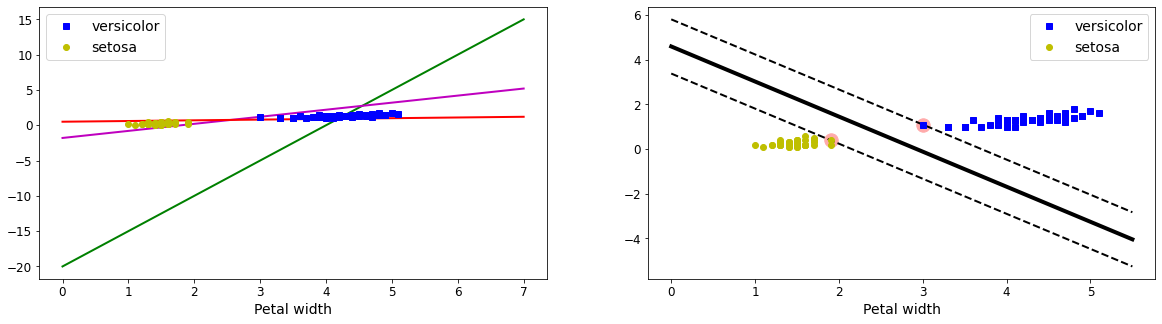

In [26]:
x0 = np.linspace(0,7,200)
pred_1 = 5*x0 -20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1]*x0 -b/w[1]
    
    margin = 1/w[1]
    up_margin = decision_boundary + margin
    down_margin = decision_boundary - margin
    
    support_vectors = svm_clf.support_vectors_
    plt.scatter(support_vectors[:,0], support_vectors[:,1], s= 180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=4)
    plt.plot(x0, up_margin, 'k--', linewidth=2)
    plt.plot(x0, down_margin, 'k--', linewidth=2)
    
    
fig, axes = plt.subplots(ncols=2, figsize=(20,5))

plt.sca(axes[0])
plt.plot(x0, pred_1, 'g-', linewidth =2)
plt.plot(x0, pred_2, 'm-', linewidth =2)
plt.plot(x0, pred_3, 'r-', linewidth =2)
plt.plot(X[:, 0][y==1],X[:, 1][y==1], 'bs', label = 'versicolor')
plt.plot(X[:, 0][y==0],X[:, 1][y==0], 'yo', label = 'setosa')
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc = 'upper left', fontsize=14)


plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1],X[:, 1][y==1], 'bs', label = 'versicolor')
plt.plot(X[:, 0][y==0],X[:, 1][y==0], 'yo', label = 'setosa')
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc = 'upper right', fontsize=14)


plt.show()

#### Sensitivity to feature scaling

In [29]:
from sklearn.preprocessing import  StandardScaler

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']

condition = (y == 0) | (y == 1)
X,y = X[condition], y[condition]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X_scaled,y)

SVC(C=inf, kernel='linear')

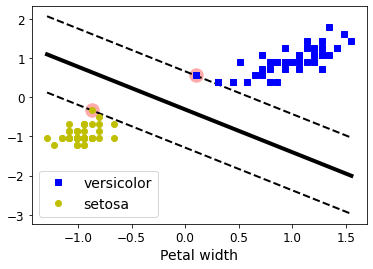

In [36]:
plot_svc_decision_boundary(svm_clf, min(X_scaled[:,0]), max(X_scaled[:,0]))
plt.plot(X_scaled[:, 0][y==1],X_scaled[:, 1][y==1], 'bs', label = 'versicolor')
plt.plot(X_scaled[:, 0][y==0],X_scaled[:, 1][y==0], 'yo', label = 'setosa')
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc = 'lower left', fontsize=14)
plt.show()

#### Handling outliers

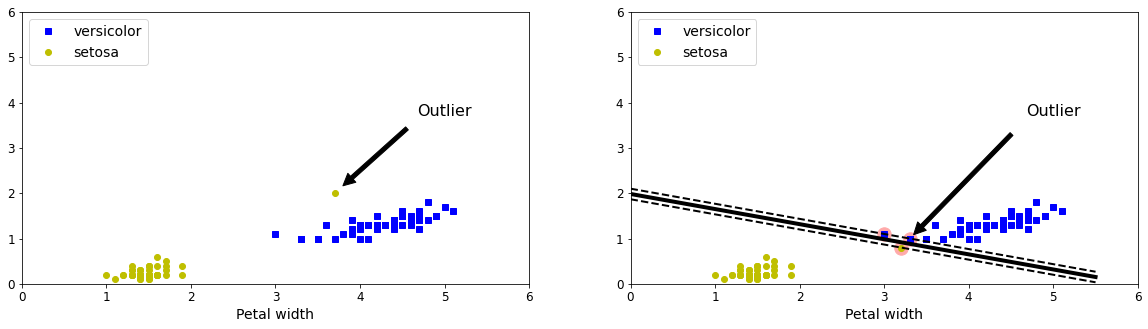

In [55]:
X_outliers = np.array([[3.7, 2], [3.2, 0.8]])
y_outliers = np.array([0,0])

X1 = np.concatenate([X, X_outliers[:1]], axis = 0)
y1 = np.concatenate([y, y_outliers[:1]], axis = 0)
X2 = np.concatenate([X, X_outliers[1:]], axis = 0)
y2 = np.concatenate([y, y_outliers[1:]], axis = 0)

svm_clf2 = SVC(kernel = 'linear', C = 10**9)
svm_clf2.fit(X2, y2)

fig, axes = plt.subplots(ncols=2, figsize=(20,5))

plt.sca(axes[0])
plt.plot(X1[:, 0][y1==1],X1[:, 1][y1==1], 'bs', label = 'versicolor')
plt.plot(X1[:, 0][y1==0],X1[:, 1][y1==0], 'yo', label = 'setosa')
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc = 'upper left', fontsize=14)
plt.annotate('Outlier',
            xy = (X_outliers[0][0], X_outliers[0][1]),
            xytext = (5, 3.7),
            ha = 'center',
            arrowprops = dict(facecolor= 'black', shrink = 0.1),
            fontsize = 16)

plt.axis([0, 6, 0, 6])


plt.sca(axes[1])
plt.plot(X2[:, 0][y2==1],X2[:, 1][y2==1], 'bs', label = 'versicolor')
plt.plot(X2[:, 0][y2==0],X2[:, 1][y2==0], 'yo', label = 'setosa')
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc = 'upper left', fontsize=14)
plt.annotate('Outlier',
            xy = (X_outliers[1][0], X_outliers[1][1]),
            xytext = (5, 3.7),
            ha = 'center',
            arrowprops = dict(facecolor= 'black', shrink = 0.1),
            fontsize = 16)

plt.axis([0, 6, 0, 6])

plt.show()

#### Large margin vs violations

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss = 'hinge', random_state=123))
])

svm_clf3.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=123))])

In [60]:
svm_clf3.predict([[5,2]])

array([1.])

Different regularization settings

In [68]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf1 = LinearSVC(C=1, loss = 'hinge', random_state=42)
svm_clf2 = LinearSVC(C=100, loss = 'hinge', random_state=42)


svm_clf_pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', svm_clf1)
])
svm_clf_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', svm_clf2)
])
svm_clf_pipeline_1.fit(X,y)
svm_clf_pipeline_2.fit(X,y)

C:\Users\Devansh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

(4.0, 5.9, 0.8, 2.8)

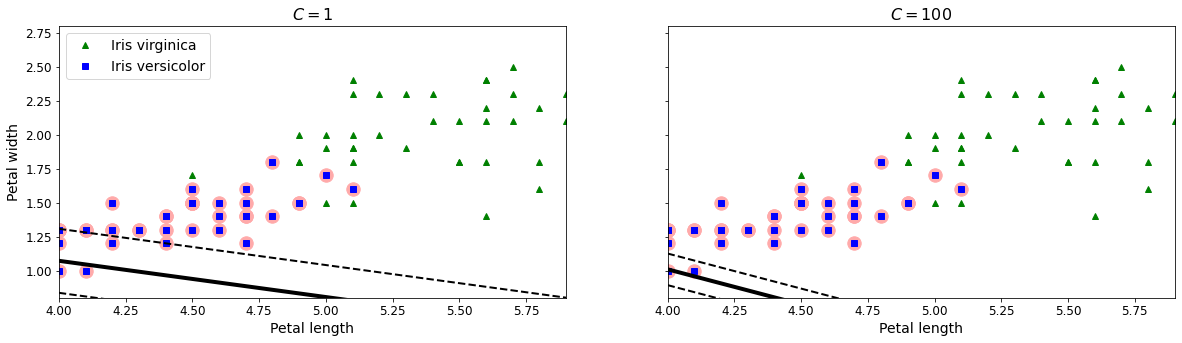

In [69]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(20, 5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])